In [ ]:
import pandas as pd
import pandas as lag_plot
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot

# Membaca file CSV
df = pd.read_csv("/content/aoa.us.txt")

# Menampilkan 5 data terakhir
print(df.tail())


            Date   Open     High      Low    Close  Volume  OpenInt
2260  2017-11-06  54.56  54.7128  54.5500  54.7000   37036        0
2261  2017-11-07  54.65  54.7000  54.5000  54.5800   55886        0
2262  2017-11-08  54.58  54.7000  54.5500  54.6400   53090        0
2263  2017-11-09  54.37  54.4899  54.1800  54.4100   48612        0
2264  2017-11-10  54.32  54.3899  54.2901  54.3448   60083        0


In [ ]:
print(df.head())
print(df.shape)
print(df.columns)

         Date    Open    High     Low   Close  Volume  OpenInt
0  2008-11-11  21.847  21.847  21.847  21.847     113        0
1  2008-11-12  20.666  20.666  20.666  20.666     113        0
2  2008-11-14  19.947  20.067  19.947  19.947    2307        0
3  2008-11-17  19.947  19.973  19.947  19.947    1502        0
4  2008-11-18  19.627  19.627  18.922  18.922    3229        0
(2265, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


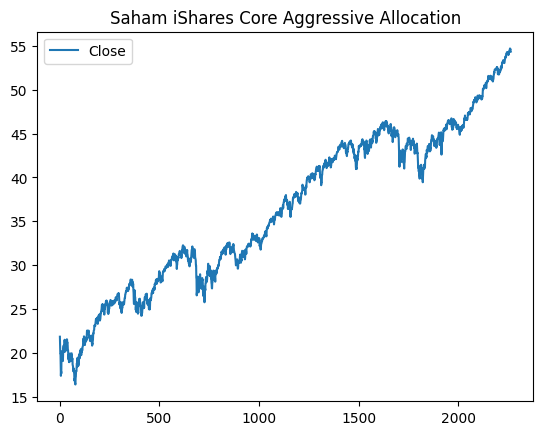

In [ ]:
df[['Close']].plot()
plt.title("Saham iShares Core Aggressive Allocation")
plt.show()

Text(0.5, 1.0, 'Saham iShares Core Aggressive Allocation')

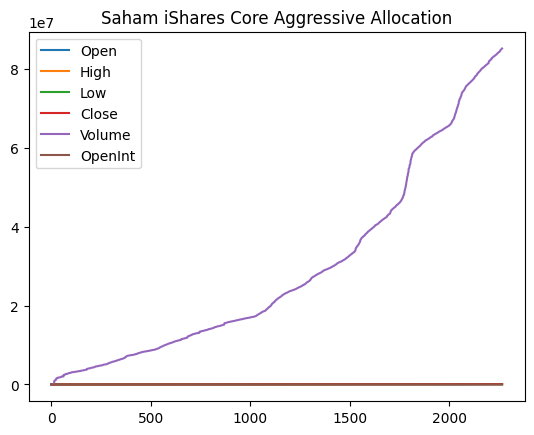

In [ ]:
dr = df.cumsum()
dr.plot()
plt.title('Saham iShares Core Aggressive Allocation')

Text(0.5, 1.0, 'Saham iShares Core Aggressive Allocation')

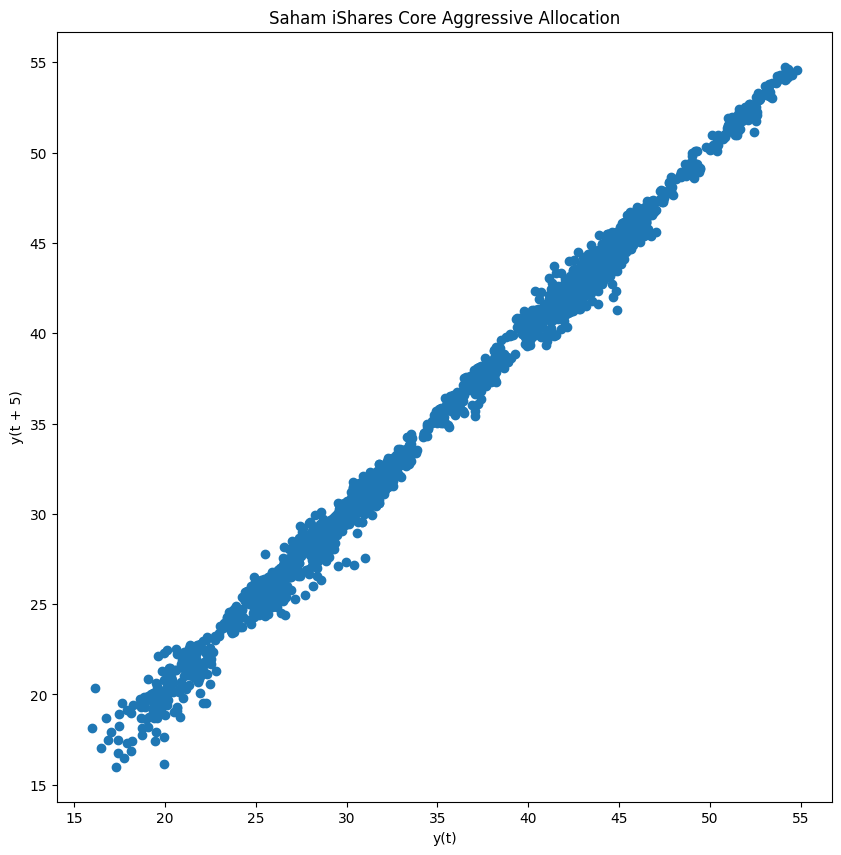

In [ ]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Saham iShares Core Aggressive Allocation')

In [ ]:
df['Date'][1785]

'2015-12-17'

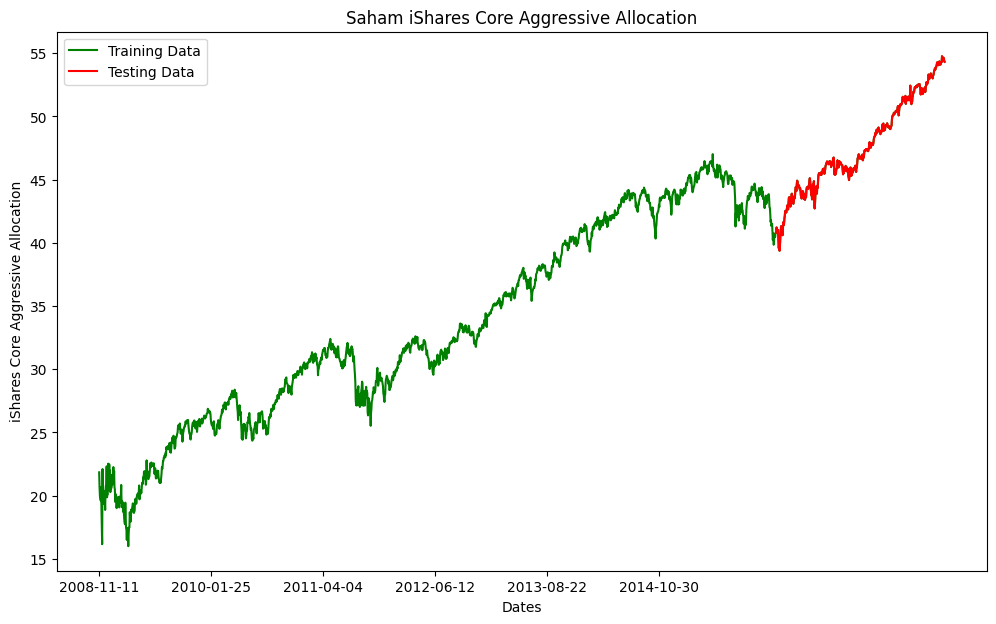

In [ ]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Saham iShares Core Aggressive Allocation')
plt.xlabel('Dates')
plt.ylabel('iShares Core Aggressive Allocation')
plt.plot(df['Open'], 'green', label='Training Data')
plt.plot(test_data['Open'], 'red', label='Testing Data')
plt.xticks(np.arange(0,1785, 300), df['Date'][0:1785:300])
plt.legend()

In [ ]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [ ]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 0.075
Symmetric mean absolute percentage error: 0.424


<ipython-input-23-21897b365a12>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "red" (-> color=(1.0, 0.0, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(df['Open'], 'red', color='red', label='Training Data')


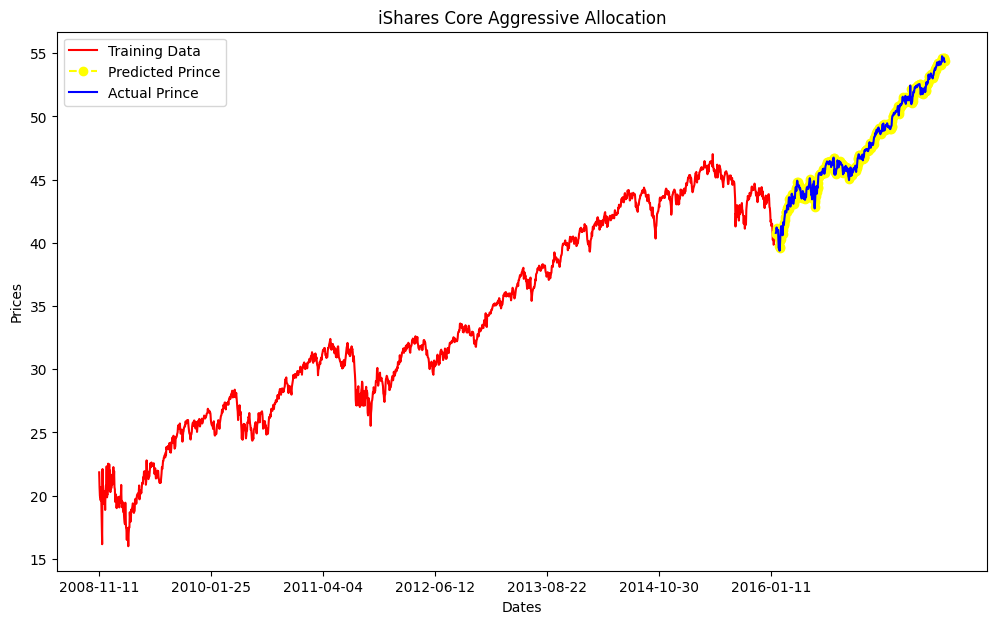

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'red', color='red', label='Training Data')
plt.plot(test_data.index, predictions, color='yellow', marker='o', linestyle='dashed',
         label='Predicted Prince')
plt.plot(test_data.index, test_data['Open'], color='blue', label='Actual Prince')
plt.title('iShares Core Aggressive Allocation')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

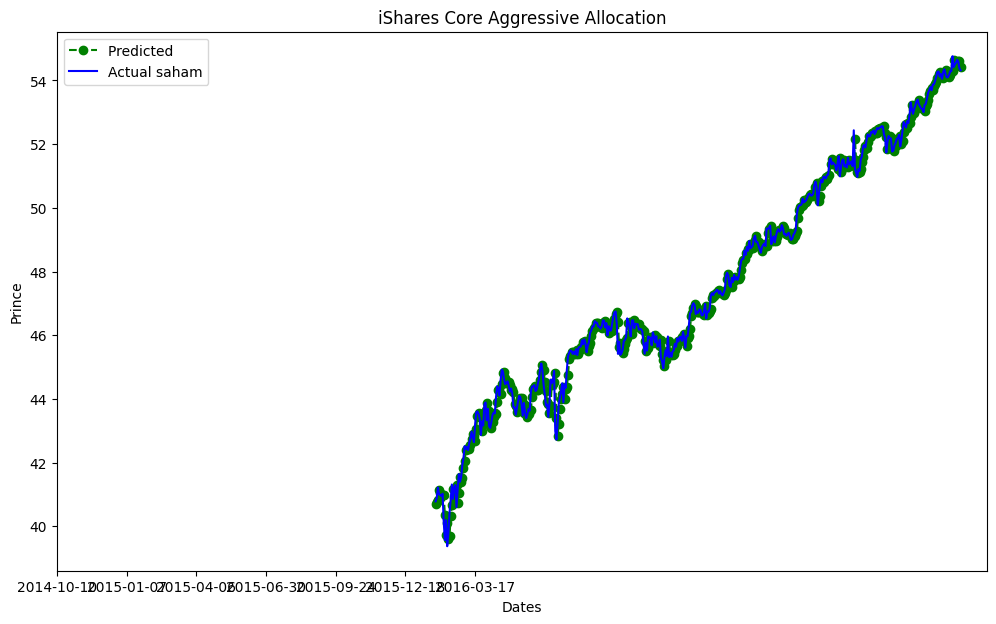

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted ')
plt.plot(test_data.index, test_data['Open'], color='blue', label='Actual saham')
plt.xticks(np.arange(1486,1856, 60), df['Date'][1486:1856:60])
plt.title('iShares Core Aggressive Allocation')
plt.xlabel('Dates')
plt.ylabel('Prince')
plt.legend()

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 0.0676
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 5.3756e-04
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 3.2926e-04
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.6699e-04
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 3.0013e-04
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 2.6522e-04
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.8841e-04
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 3.0195e-04
Epoch 9/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.6983e-04
Epoch 10/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.8455e-04
Epoch 11/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 2.6911e-04
Epoch 12/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 3.1652e-04
Epoch 13/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 2.7887e-04
Epoch 14/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 2.6719e-04
Epoch 15/30
56/56 ━━━━━━━━━━━━

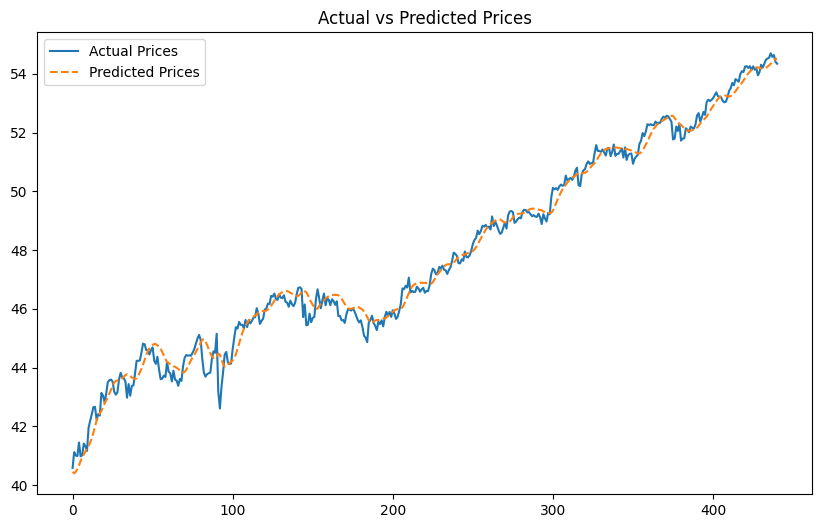

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

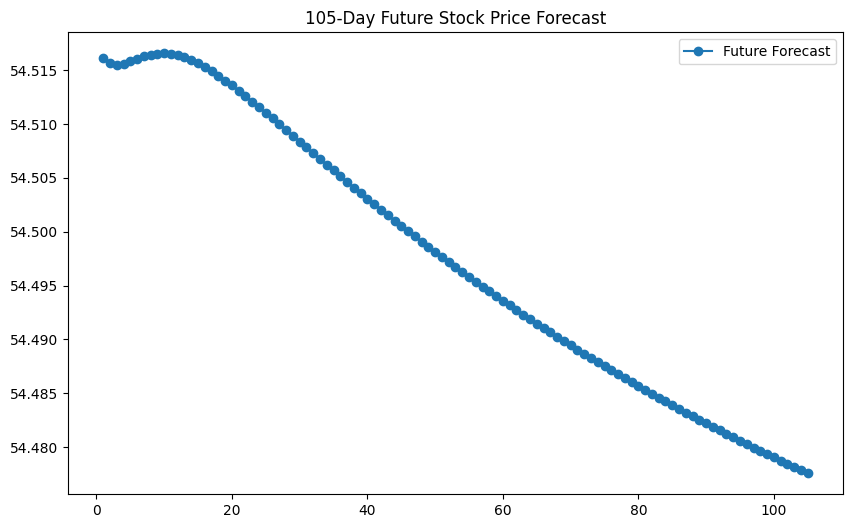

Prediksi harga masa depan:


array([[54.51609 ],
       [54.51565 ],
       [54.515514],
       [54.515614],
       [54.515816],
       [54.516056],
       [54.516273],
       [54.51644 ],
       [54.51654 ],
       [54.516563],
       [54.516502],
       [54.516373],
       [54.51618 ],
       [54.515923],
       [54.515625],
       [54.515274],
       [54.514896],
       [54.51448 ],
       [54.51403 ],
       [54.513573],
       [54.513084],
       [54.512592],
       [54.51208 ],
       [54.511562],
       [54.511044],
       [54.510513],
       [54.509975],
       [54.509445],
       [54.508904],
       [54.508366],
       [54.50782 ],
       [54.507286],
       [54.506752],
       [54.50621 ],
       [54.505688],
       [54.505142],
       [54.504627],
       [54.504097],
       [54.50358 ],
       [54.503063],
       [54.502552],
       [54.50205 ],
       [54.501537],
       [54.501034],
       [54.500546],
       [54.50005 ],
       [54.49956 ],
       [54.499077],
       [54.498596],
       [54.498127],


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load dataset
data = pd.read_csv('aoa.us.txt', parse_dates=['Date'], index_col='Date')

# harga penutupan (Close)
stock_prices = data['Close'].values.reshape(-1, 1)

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_prices)

# Membuat dataset untuk LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshape data untuk input ke LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split data menjadi pelatihan dan pengujian
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Membangun model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train, y_train, batch_size=32, epochs=30)

# Evaluasi model pada data uji
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Denormalisasi

# Denormalisasi data asli untuk evaluasi
y_test_denorm = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.plot(y_test_denorm, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices', linestyle='--')
plt.legend()
plt.title("Actual vs Predicted Prices")
plt.show()

# Prediksi
def forecast_future(data, model, steps, scaler):
    last_sequence = data[-time_step:]  # Ambil urutan terakhir
    predictions = []
    for _ in range(steps):
        input_seq = last_sequence.reshape((1, time_step, 1))
        pred = model.predict(input_seq)
        predictions.append(pred[0, 0])
        last_sequence = np.append(last_sequence[1:], pred[0, 0])
    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Pengaturan Prediksi
days_to_predict = 105
future_forecast = forecast_future(scaled_data, model, days_to_predict, scaler)

# Visualisasi prediksi
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, days_to_predict + 1), future_forecast, marker='o', label="Future Forecast")
plt.legend()
plt.title(f"{days_to_predict}-Day Future Stock Price Forecast")
plt.show()

# Output hasil prediksi
print("Prediksi harga masa depan:")
display(future_forecast)